In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [86]:
from sklearn.metrics import recall_score,accuracy_score,precision_score
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras import losses,layers
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [73]:
(x_train,_),(x_test,_) = fashion_mnist.load_data()

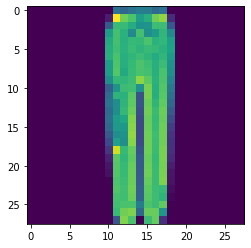

In [74]:
plt.imshow(x_train[1000])

In [102]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

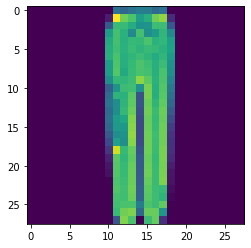

In [76]:
plt.imshow(x_train[1000])

In [78]:
print(x_test.shape)
print(x_train.shape)

(10000, 28, 28)
(60000, 28, 28)


In [110]:
class Autoencoder(Model):
    
    def __init__(self,latent_dim):
        super(Autoencoder,self).__init__()
        self.latent_dim = latent_dim
        self.encoder = keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim,activation = 'relu')
        ])
        
        self.decoder = keras.Sequential([
            layers.Dense(784,activation = 'sigmoid'),
            layers.Reshape((28,28))
        ])
        
    def call(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
autoencoder = Autoencoder(64)

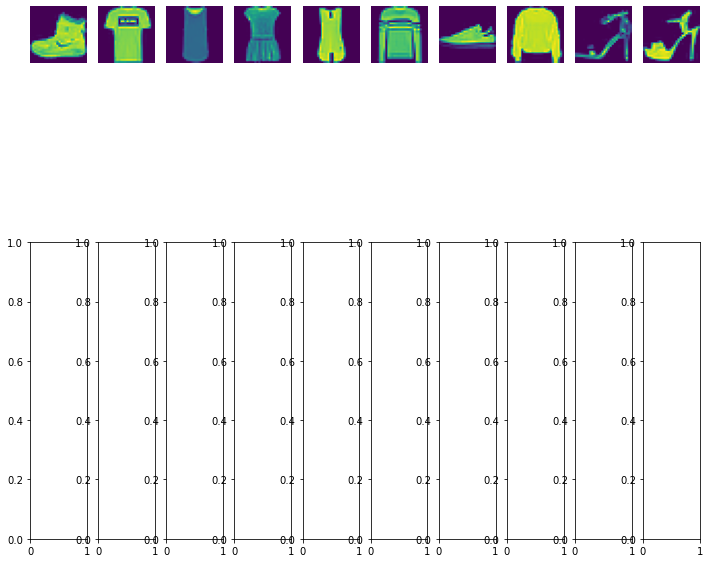

In [131]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,10,figsize = (12,12))
for ax,image in zip(axes[0,:],x_train[:10]):
    ax.imshow(image)
    ax.set_axis_off()
#     plt.tightlayout()
plt.show()

In [132]:
from keras.optimizers import Adam

In [133]:
autoencoder.compile(optimizer = 'adam',loss = losses.MeanSquaredError(),metrics = ['accuracy'])

In [134]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 5.5882e-07 - accuracy: 0.0811 - val_loss: 5.5728e-07 - val_accuracy: 0.0809
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 5.5873e-07 - accuracy: 0.0813 - val_loss: 5.5719e-07 - val_accuracy: 0.0804
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 5.5862e-07 - accuracy: 0.0813 - val_loss: 5.5708e-07 - val_accuracy: 0.0804
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 5.5852e-07 - accuracy: 0.0811 - val_loss: 5.5698e-07 - val_accuracy: 0.0811
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 5.5840e-07 - accuracy: 0.0814 - val_loss: 5.5687e-07 - val_accuracy: 0.0808
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 5.5829e-07 - accuracy: 0.0812 - val_loss: 5.5688e-07 - val_accuracy: 0.0807
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 5.5818e-07 -

In [139]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

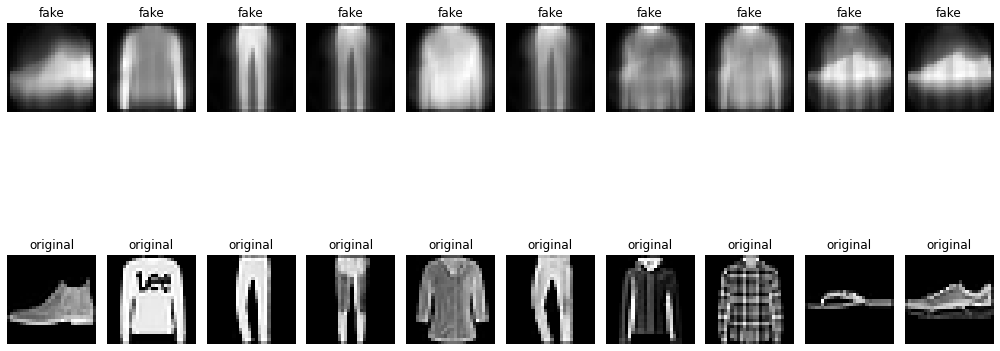

In [173]:
_,axes = plt.subplots(2,10,figsize = (14,14))
for ax,image in zip(axes[0,:],decoded_imgs[:10]):
    ax.imshow(image)
    ax.set_title('fake')
    ax.set_axis_off()
    plt.gray()
    plt.tight_layout()

for ax,image in zip(axes[1,:],x_test[:10]):
    ax.imshow(image)
    ax.set_title('original')
    ax.set_axis_off()
    plt.gray()
    plt.tight_layout()
plt.show()

In [161]:
import numpy as np

In [167]:
dec = np.reshape(encoded_imgs,(-1,8,8))

In [168]:
dec.shape

(10000, 8, 8)

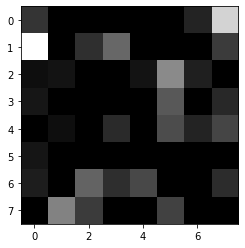

In [172]:
plt.imshow(dec[])
plt.gray()
plt.show()